In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, chi2_contingency
import seaborn as sns

In [4]:
# Corrected file path using a raw string
file_path = r"C:\KSI-Python Projects\practice01.csv"

data = pd.read_csv(file_path)
# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
# 1) Overall average tip
average_tip = df['tip'].mean()
average_tip

2.99827868852459

In [9]:
# 2) Statistical summary for numerical variables
stat_summary = df.describe()
stat_summary

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [13]:
# 2.1) Null values and percentage
null_values = df.isnull().sum()
percentage_null = (null_values / len(df)) * 100

print(pd.concat([null_values, percentage_null], axis=1, keys=['Null Values', 'Null Percentage']))

            Null Values  Null Percentage
total_bill            0              0.0
tip                   0              0.0
sex                   0              0.0
smoker                0              0.0
day                   0              0.0
time                  0              0.0
size                  0              0.0


In [15]:
# 2.2) Numerical and Categorical variables
numerical_columns = df.select_dtypes(include='number').columns.tolist()
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['total_bill', 'tip', 'size']
Categorical columns: ['sex', 'smoker', 'day', 'time']


In [18]:

#from scipy.stats import f_oneway

female_tips = df[df['sex'] == 'Female']['tip']
male_tips = df[df['sex'] == 'Male']['tip']
# 2.3) Relationship between Numerical and Categorical variables (ANOVA for 'tip' and 'sex')

f_statistic, p_value = f_oneway(female_tips, male_tips)

print("\n2.3) ANOVA results for 'tip' and 'sex':")
print(f"ANOVA results: F-statistic = {f_statistic}, p-value = {p_value}")

if p_value < 0.05:
    print("The difference in tips between genders is statistically significant.")
else:
    print("The difference in tips between genders is not statistically significant.")


2.3) ANOVA results for 'tip' and 'sex':
ANOVA results: F-statistic = 1.9261545619320046, p-value = 0.166456235034572
The difference in tips between genders is not statistically significant.


In [19]:
# 3) Statistical summary for 'tip'
tip_summary = df['tip'].describe()
tip_summary

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [20]:
# 4) Difference between mean and median for "tip"
mean_tip = df['tip'].mean()
median_tip = df['tip'].median()
difference_mean_median = mean_tip - median_tip
difference_mean_median

0.09827868852458987

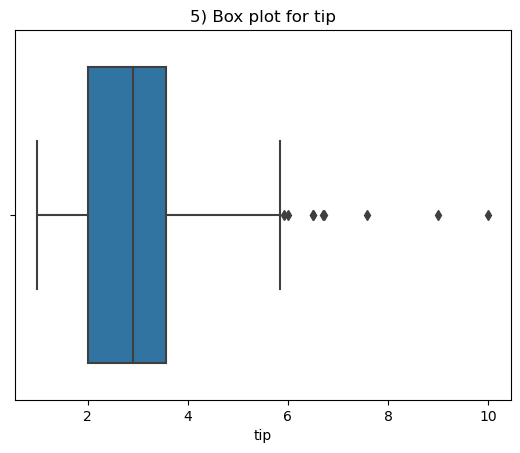

In [22]:
# 5) Box plot for 'tip'to identify outliers
sns.boxplot(x=df['tip'])
plt.title('5) Box plot for tip')
plt.show()

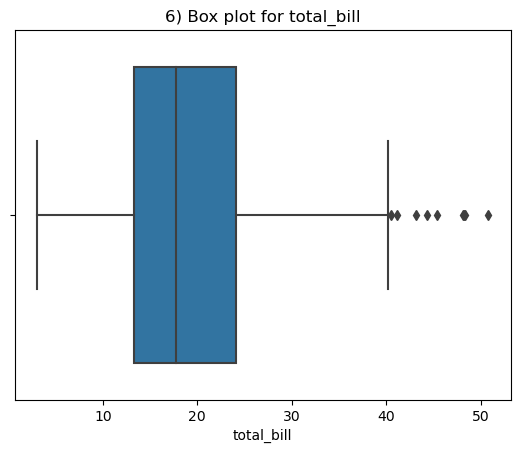

In [23]:
# 6) Box plot for 'total_bill'
sns.boxplot(x=df['total_bill'])
plt.title('6) Box plot for total_bill')
plt.show()


In [24]:
# 7) Percentage of males & females
gender_percentage = df['sex'].value_counts(normalize=True) * 100
gender_percentage

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

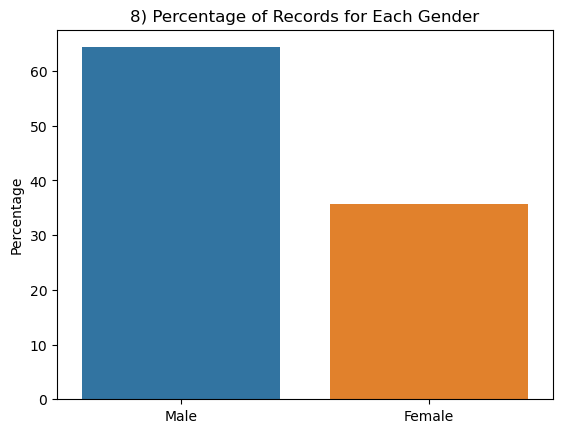

In [27]:
# 8) Bar plot for gender percentage
sns.barplot(x=gender_percentage.index, y=gender_percentage.values)
plt.ylabel('Percentage')
plt.title('8) Percentage of Records for Each Gender')
plt.show()


In [29]:
# 9) Average difference by gender
average_by_gender = data.groupby('sex')['tip'].mean()
print("\n9) Average tip by gender:")
print(average_by_gender)



9) Average tip by gender:
sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


In [30]:
# 10) Find average tip according to day (i.e. weekday) write your observation on that
average_by_day = data.groupby('day')['tip'].mean()
print("\n10) Average tip by day:")
print(average_by_day)


10) Average tip by day:
day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


In [33]:
# 11) Find the average tip according to size (number of people at the table)
average_by_size = data.groupby('size')['tip'].mean()
print("\n11) Average tip by table size:")
print(average_by_size)


11) Average tip by table size:
size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64


In [34]:
# 12) Is smokers' tip more than non-smokers?
smoker_tips = df[df['smoker'] == 'Yes']['tip']
non_smoker_tips = df[df['smoker'] == 'No']['tip']
mean_tip_smokers = smoker_tips.mean()
mean_tip_non_smokers = non_smoker_tips.mean()
print("\n12) Average tip for smokers and non-smokers:")
print(f"Average tip for smokers: {mean_tip_smokers:.2f}")
print(f"Average tip for non-smokers: {mean_tip_non_smokers:.2f}")
if mean_tip_smokers > mean_tip_non_smokers:
    print("Smokers tend to tip more than non-smokers.")
else:
    print("Non-smokers tend to tip more than smokers.")


12) Average tip for smokers and non-smokers:
Average tip for smokers: 3.01
Average tip for non-smokers: 2.99
Smokers tend to tip more than non-smokers.


In [35]:
# 13) Create a 2 by 2 and get the average tip size (Gender vs smoker and tip size).
# Which group tips the most?
# Hints (index will be sex, columns will be smoker, values will be tips)
grouped = df.groupby(['sex', 'smoker'])['tip'].mean().unstack()
print("\n13) Average tip by gender and smoker status:")
print(grouped)
if grouped.loc['Female', 'Yes'] > grouped.loc['Male', 'Yes']:
    print("Female smokers tend to tip more than male smokers.")
else:
    print("Male smokers tend to tip more than female smokers.")


13) Average tip by gender and smoker status:
smoker        No       Yes
sex                       
Female  2.773519  2.931515
Male    3.113402  3.051167
Male smokers tend to tip more than female smokers.


In [38]:
# 14) Create a column called 'pct_tip' = tip / total_bill - this would be giving 
# percentage of tip and should be a better measure of the tipping behavior.
df['pct_tip'] = df['tip'] / df['total_bill'] * 100
df.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [39]:
# 15) Find the relationships with 'pct_tip" to "sex", "size" write your observations
relationship_sex_pct_tip = df.groupby('sex')['pct_tip'].mean()
relationship_size_pct_tip = df.groupby('size')['pct_tip'].mean()
print("\n15) Relationships between 'pct_tip' and 'sex', 'size':")
print("Relationship with sex:")
print(relationship_sex_pct_tip)
print("Relationship with table size:")
print(relationship_size_pct_tip)


15) Relationships between 'pct_tip' and 'sex', 'size':
Relationship with sex:
sex
Female    16.649074
Male      15.765055
Name: pct_tip, dtype: float64
Relationship with table size:
size
1    21.729202
2    16.571919
3    15.215685
4    14.594901
5    14.149549
6    15.622920
Name: pct_tip, dtype: float64


In [40]:
# 16) Make the gender vs. smoker view using pct_tip (like task 13)
grouped_pct_tip = df.groupby(['sex', 'smoker'])['pct_tip'].mean().unstack()
print("\n16) Average pct_tip by gender and smoker status:")
print(grouped_pct_tip)


16) Average pct_tip by gender and smoker status:
smoker         No        Yes
sex                         
Female  15.692097  18.215035
Male    16.066872  15.277118


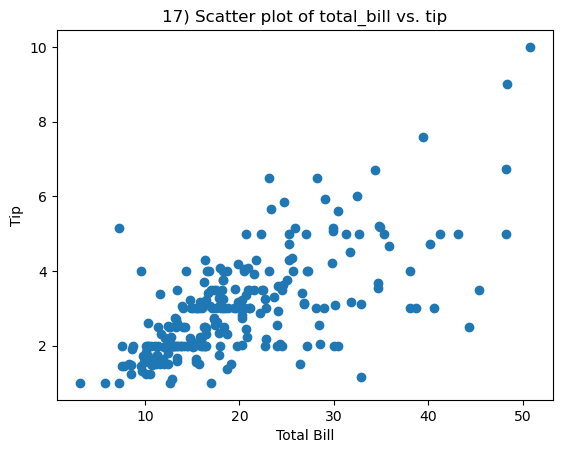

In [45]:
# 17) Make a scatter plot of total_bill vs. tip
plt.scatter(data['total_bill'], data['tip'])
plt.title('17) Scatter plot of total_bill vs. tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

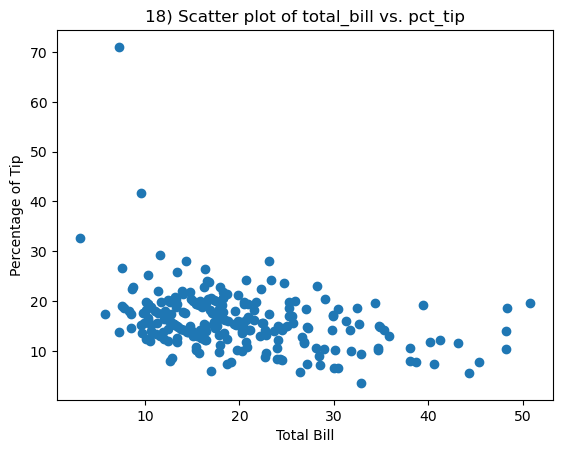

In [46]:
# 18) Make a scatter plot of total_bill vs. pct_tip
plt.scatter(df['total_bill'], df['pct_tip'])
plt.title('18) Scatter plot of total_bill vs. pct_tip')
plt.xlabel('Total Bill')
plt.ylabel('Percentage of Tip')
plt.show()

In [47]:
# 19) Describe or write your observations according to 17 and 18
print("\n19) Observations from scatter plots:")
print("Scatter plot of total_bill vs. tip: Shows the relationship between total bill and tip amount.")
print("Scatter plot of total_bill vs. pct_tip: Indicates the trend of tip percentage concerning total bill.")


19) Observations from scatter plots:
Scatter plot of total_bill vs. tip: Shows the relationship between total bill and tip amount.
Scatter plot of total_bill vs. pct_tip: Indicates the trend of tip percentage concerning total bill.


Thanks.